# Data Preprocessing for Student Performance Analysis
This notebook handles loading the dataset, cleaning data, handling missing values, and feature engineering.


In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")

In [36]:
# LOAD DATA
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print("Data preview:\n")
print(df.head())

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (4).csv
Data preview:

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium  

In [37]:
# CLEAN DATA
df.replace(["", " "], np.nan, inplace=True)

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-481874856.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


VISUALIZATION

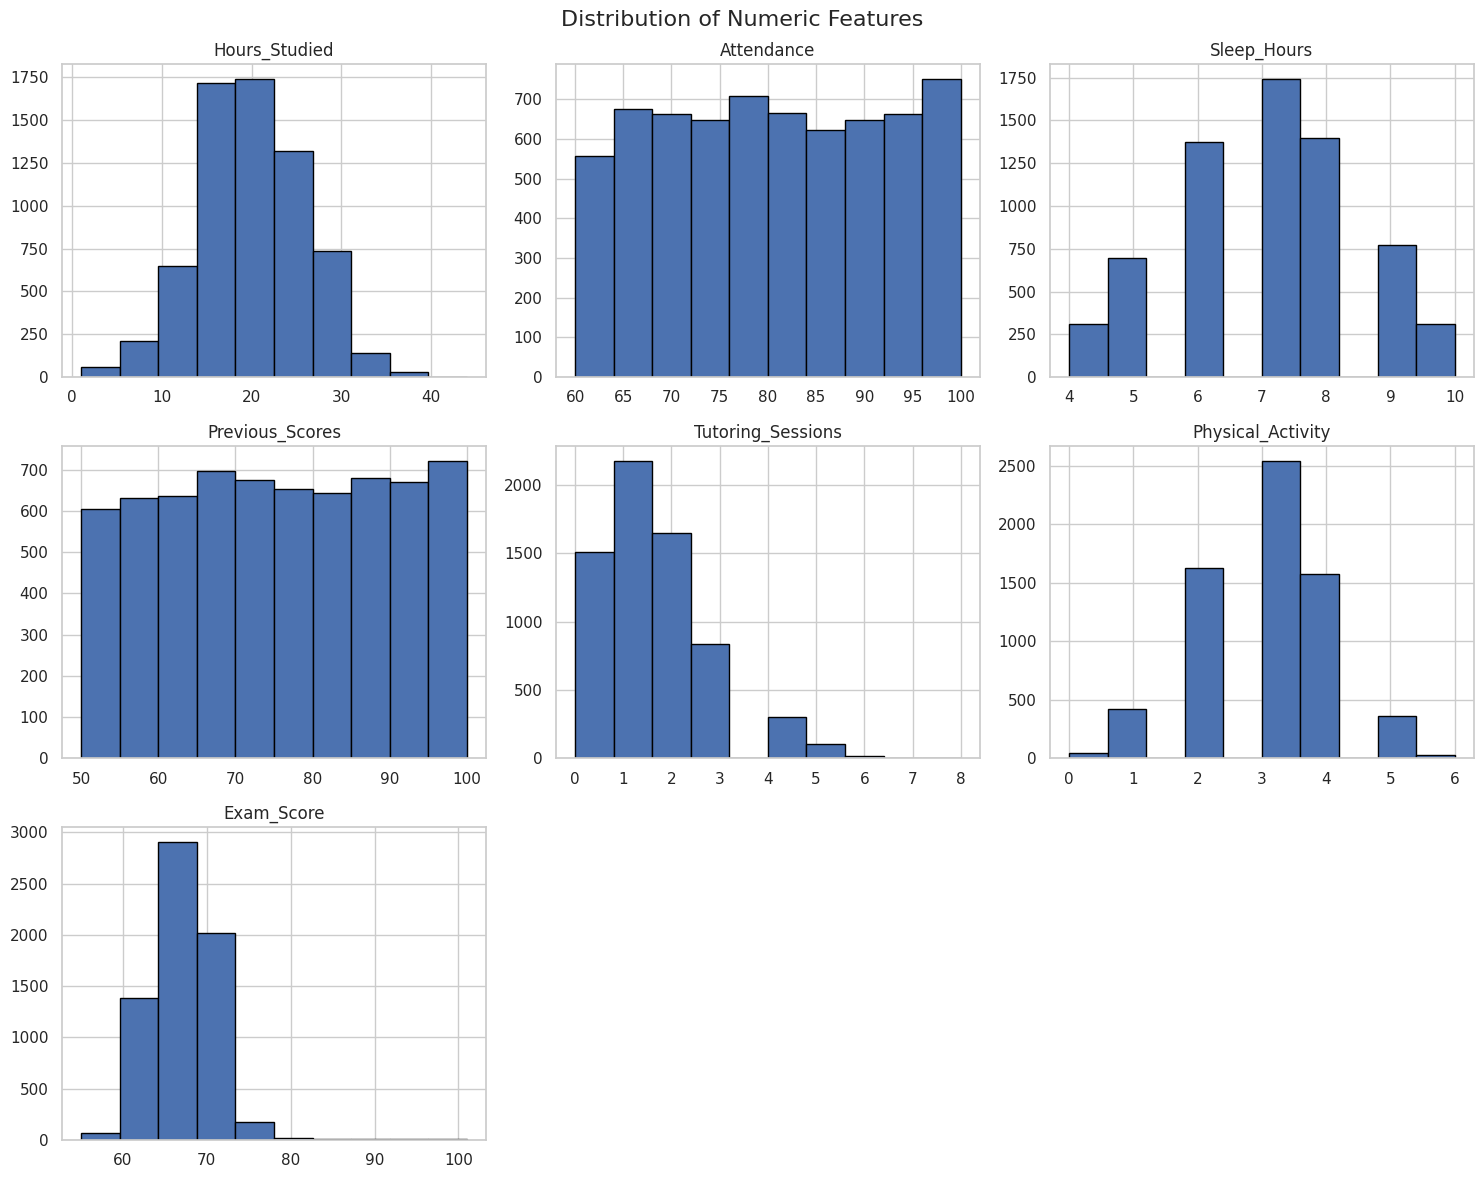

In [38]:
# Histogram

df[num_cols].hist(figsize=(15,12), edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize = 16)
plt.tight_layout()
plt.show()

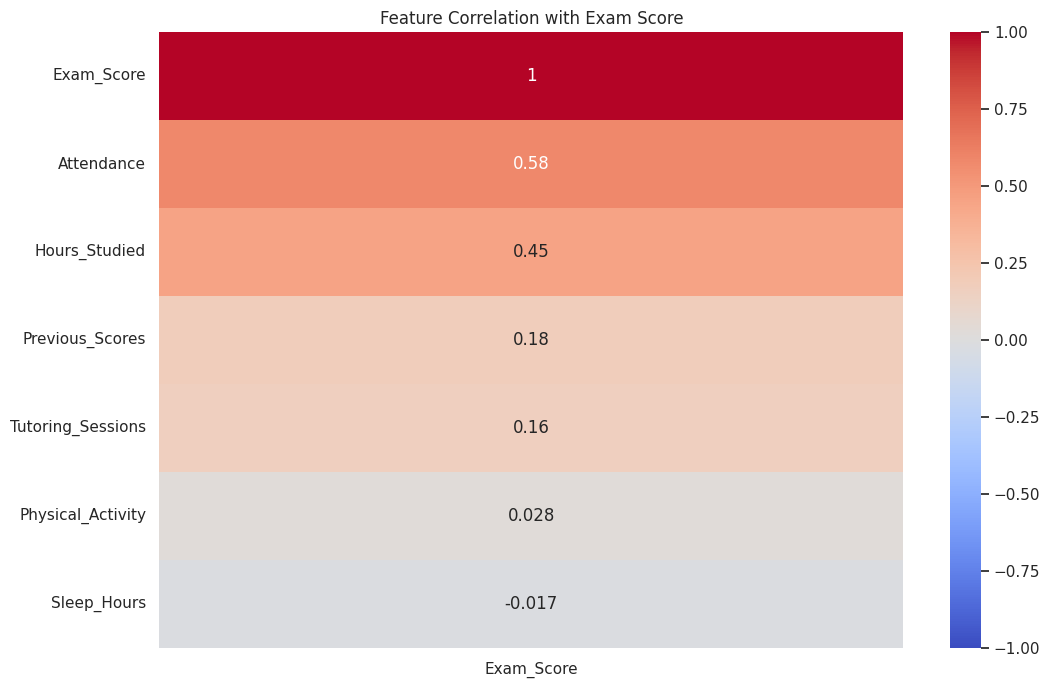

In [39]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
corr_matrix = df[num_cols].corr()

# Sort features by correlation with Exam_Score
corr_sorted = corr_matrix[['Exam_Score']].sort_values(by='Exam_Score', ascending=False)
sns.heatmap(corr_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Exam Score")
plt.show()


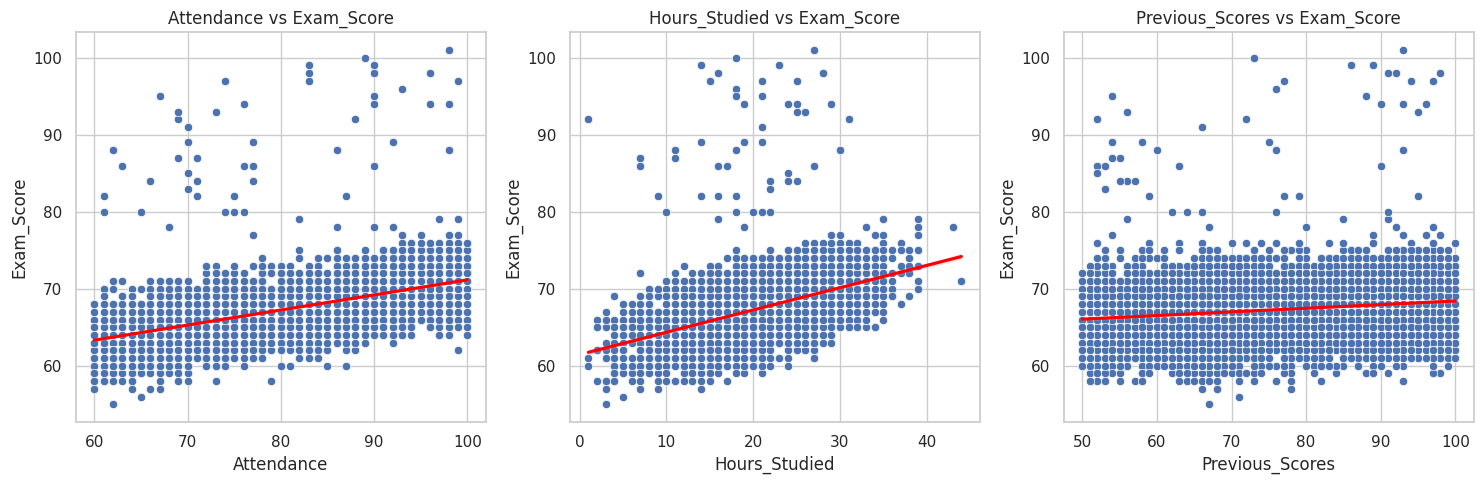

In [40]:
# Scatter plots for Top Features vs Exam_Score

top_features = corr_sorted.index[1:4]  # top 3 features excluding Exam_Score itself
plt.figure(figsize=(15,5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='Exam_Score')
    sns.regplot(data=df, x=feature, y='Exam_Score', scatter=False, color='red')
    plt.title(f'{feature} vs Exam_Score')
plt.tight_layout()
plt.show()

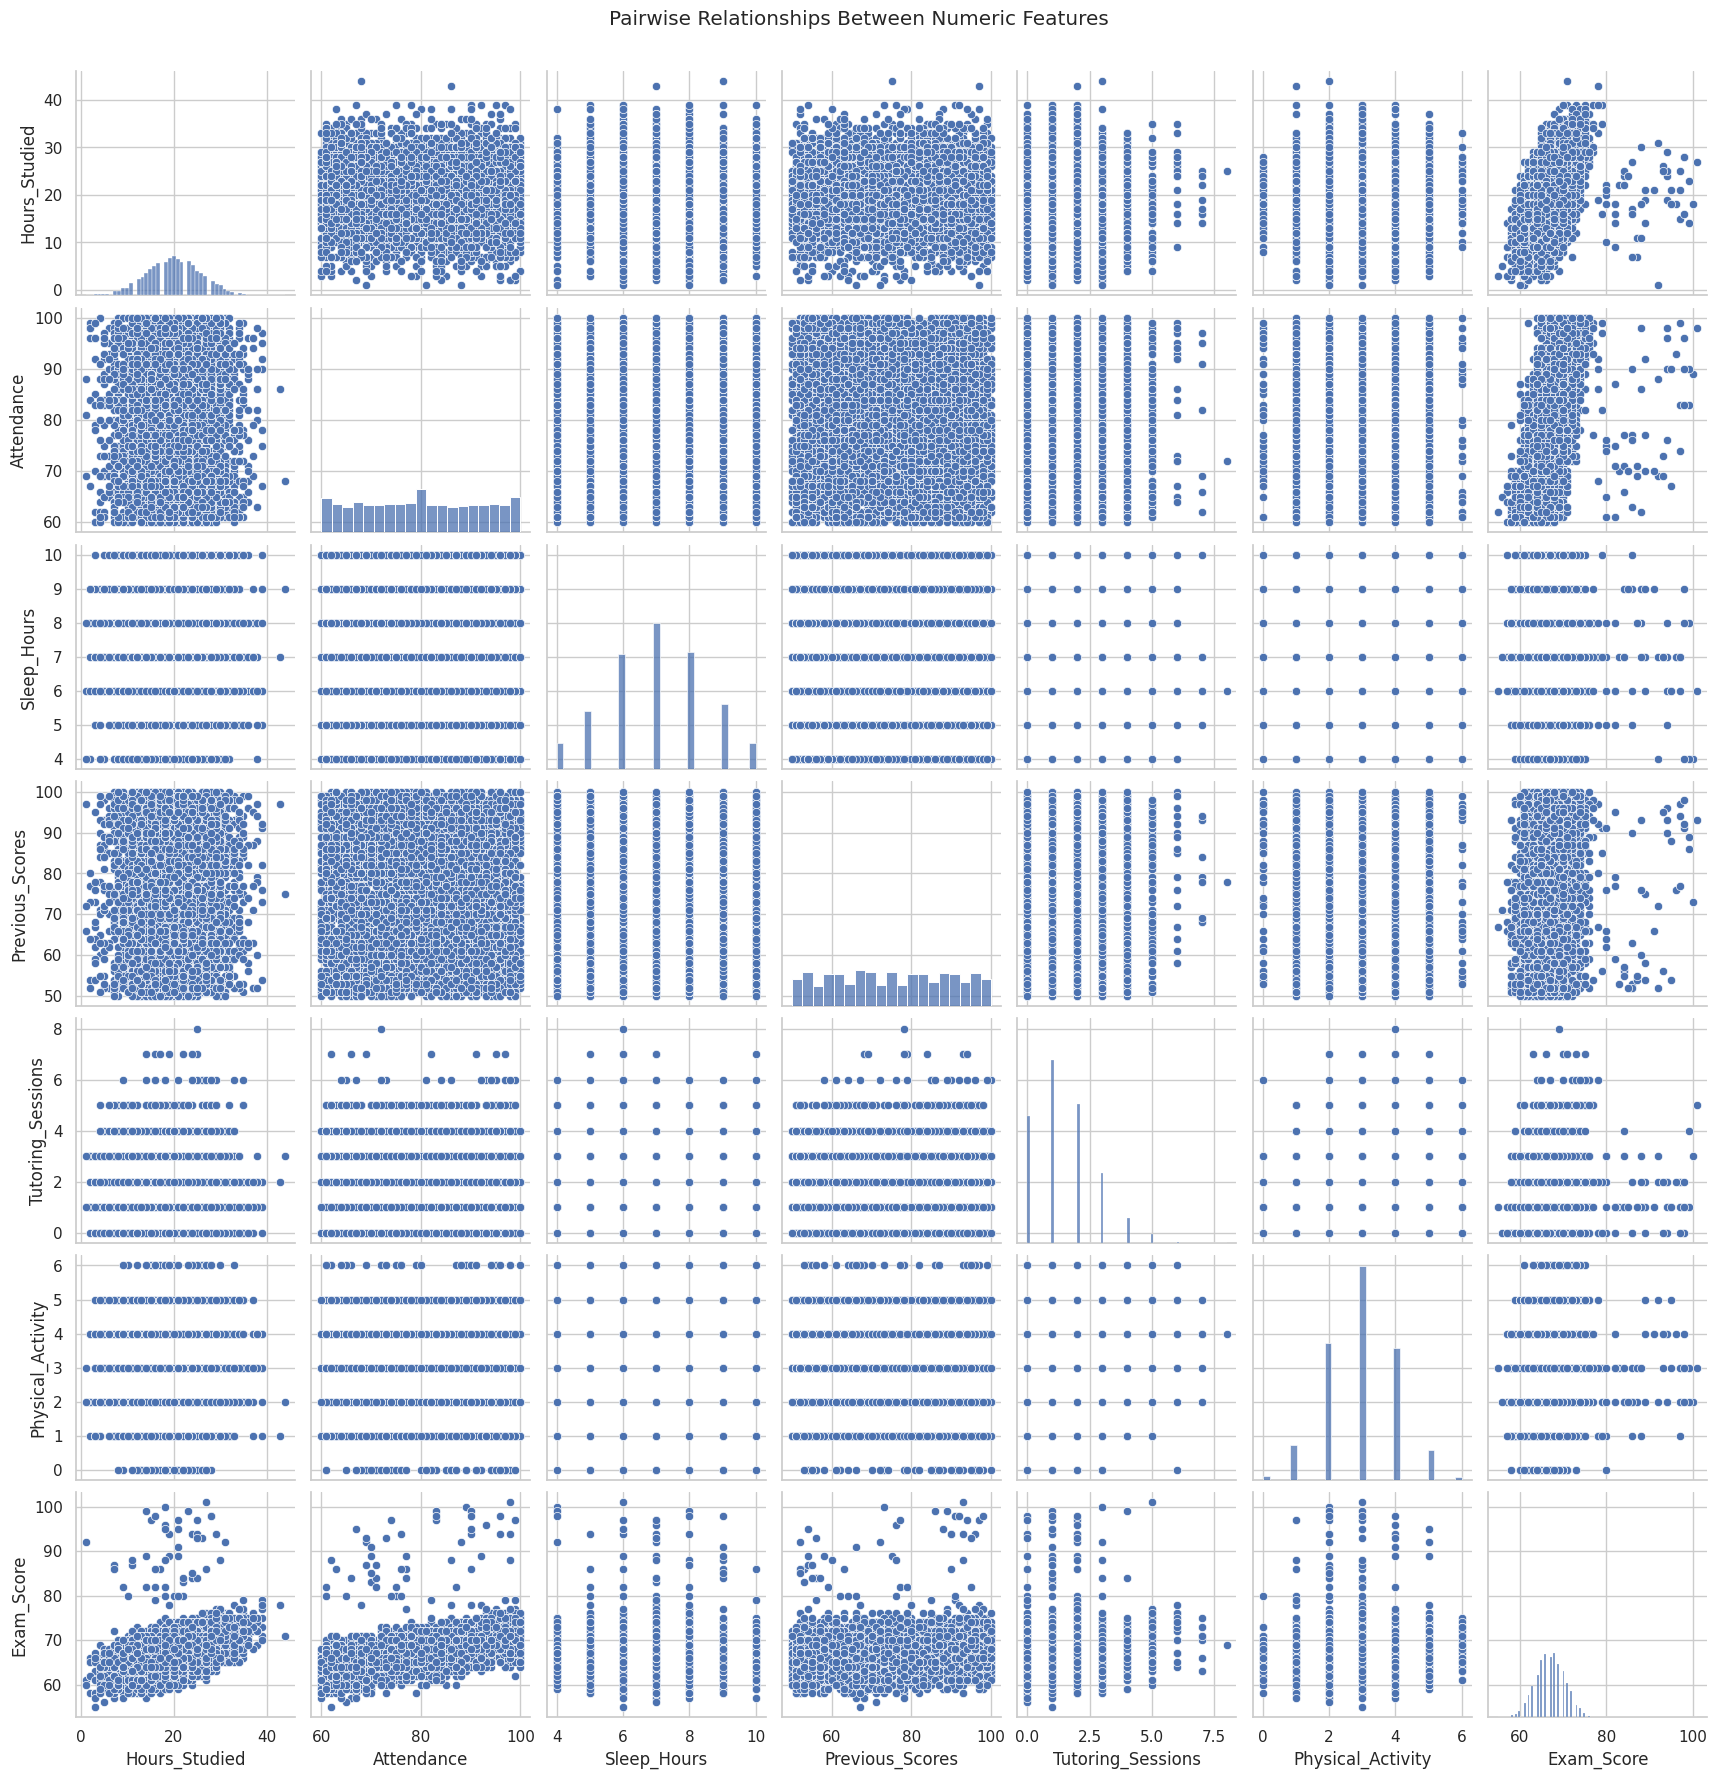

In [41]:
# Pairplot for numeric features

sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()


In [42]:
# IDENTIFY MAIN FACTORS

main_factors = corr_matrix['Exam_Score'].abs().sort_values(ascending=False).index[1:6]
print("Main factors contributing to student performance (top 5):")
for i, f in enumerate(main_factors, start=1):
    print(f"{i}. {f} - correlation: {corr_matrix['Exam_Score'][f]:.2f}")

Main factors contributing to student performance (top 5):
1. Attendance - correlation: 0.58
2. Hours_Studied - correlation: 0.45
3. Previous_Scores - correlation: 0.18
4. Tutoring_Sessions - correlation: 0.16
5. Physical_Activity - correlation: 0.03


In [43]:
# SAVE CLEANED CSV

df.to_csv("StudentPerformanceFactors_Cleaned.csv", index=False)
files.download("StudentPerformanceFactors_Cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>